In [30]:
import sys
#Move to parent folder
sys.path.insert(0, '../../croprows-cli/src/')

import croprows_globals as crglobals
import croprows_utils as crutils
import imutils_boundingrect as imboundrect

import croprows_geo as crgeo

import imp 
imp.reload(crglobals)
imp.reload(crutils)
imp.reload(crgeo)

imp.reload(imboundrect)

import pandas as pd
import geopandas as gpd
import json
import geojson
from shapely.geometry import shape
from shapely.wkt import dumps, loads
from shapely.geometry.polygon import LineString, LinearRing, Polygon
from shapely.geometry import Point

import os
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import re

####################################################################

 #####  ######  ####### ######  ######  ####### #     #  #####     
#     # #     # #     # #     # #     # #     # #  #  # #     #    
#       #     # #     # #     # #     # #     # #  #  # #          
#       ######  #     # ######  ######  #     # #  #  #  #####     
#       #   #   #     # #       #   #   #     # #  #  #       #    
#     # #    #  #     # #       #    #  #     # #  #  # #     #    
 #####  #     # ####### #       #     # #######  ## ##   #####     
                                                  Version 1.0		

####################################################################
croprows_globals [ module loaded ]
croprows_utils [ module loaded ]
croprows_geo [ module loaded ]


In [31]:
#merded_lines = '../orthomosaics/cropped/mosaic_16_12_1077px_192_tiles/vectors/obj/merged_lines.shp'
#bounds = '../orthomosaics/field_boundary2.shp'

#merded_lines = '../orthomosaics/cropped/mosaic_5_5_1077px_25_tiles/vectors/obj/merged_lines.shp'
#bounds = '../orthomosaics/testmask3.shp'

merded_lines = '../../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/vectors/obj/merged_lines.shp'
bounds = '../../orthomosaics/testmask3.shp'

(378906.10141152021, 378975.52009806735)

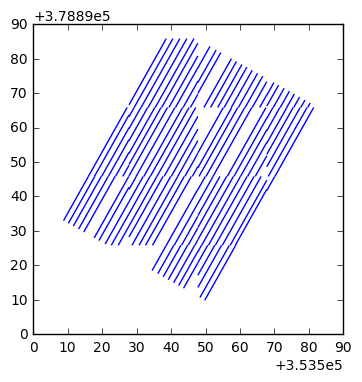

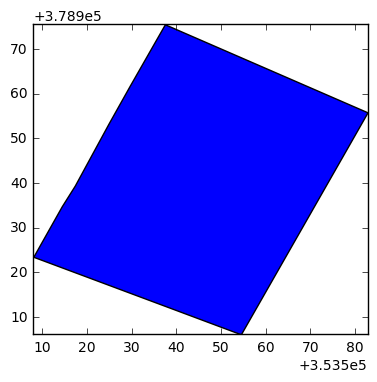

In [32]:
lineas1 = gpd.GeoDataFrame.from_file(merded_lines)
boxl = gpd.GeoDataFrame.from_file(bounds)
lineas1.geometry.plot()
boxl.geometry.plot()

plt.xlim([np.min(boxl.geometry.bounds.minx), np.max(boxl.geometry.bounds.maxx)])
plt.ylim([np.min(boxl.geometry.bounds.miny), np.max(boxl.geometry.bounds.maxy)])

In [33]:
crs = {'init': 'epsg:32618'}


longlines=[]
idlonglines=[]
for x in range (0 , len(lineas1.geometry)):
    linea_bx= (list(lineas1.geometry[x].coords))
    long_line = crgeo.getExtrapoledLine(*linea_bx[-2:])
    idlonglines.append(x)
    longlines.append(long_line)

In [34]:
dflonglines = pd.DataFrame({'id': idlonglines})
geodflonglines=gpd.GeoDataFrame(dflonglines, crs=crs, geometry=longlines)
crutils.printLogMsg('[done] generated long lines !')

[done] generated long lines !


In [35]:
#llines= '../orthomosaics/cropped/mosaic_16_12_1077px_192_tiles/vectors/obj/merged_lines_long.shp'
#llines= '../orthomosaics/cropped/mosaic_5_5_1077px_25_tiles/vectors/obj/merged_lines_long.shp'

llines= '../../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/vectors/obj/merged_lines_long.shp'


geodflonglines.to_file(driver = 'ESRI Shapefile', filename=llines)

In [36]:
#cut lines by polygon contour
#(geodflonglines.intersection(boxl.geometry.iloc[0]))

#print(boxl.envelope.envelope)

#rotate(self, angle, origin='center', use_radians=False)

#cut lines by envelope
#dflinecutbybox=(geodflonglines.intersection(boxl.envelope.iloc[0]))

#Get the convex hull lines
convexhull = boxl.convex_hull.iloc[0]

x, y = convexhull.exterior.xy

print(np.array(x))
print(np.array(y))

print('---------------------------------')

points0 = np.array(list(zip(x,y)))
print('points0:')
print(points0)


mibboxrec0= imboundrect.minimum_bounding_rectangle(points0)
print('mibboxrec0:')
print(mibboxrec0)

print(mibboxrec0[0])

p1 = Polygon([mibboxrec0[0], mibboxrec0[1], mibboxrec0[2] , mibboxrec0[3]])
print(p1)    

#mergea = np.array( [np.array(x) np.array(y)])
#print(mergea)

#print('---------------------------------')
#print('points')
#points = np.array([[353717.4251202932,378843.1554846447], 
#                   [353510.4021258399,378924.9081859781],
#                   [353580.3321288265,379050.9331194181],
#                   [353776.7901587999,378940.7556326981], 
#                   [353779.3056265332,378933.2092294981],
#                   [353717.4251202932,378843.1554846447]])
#print(points)

#mibboxrec= crgeo.minimum_bounding_rectangle(points)
#print('minboxrec')
#print(mibboxrec)




########

#print(points)
#mibboxrec= crgeo.minimum_bounding_rectangle(points)

#print(mibboxrec)

##########


#print(convexhull.exterior.xy)

#points2 = np.array(convexhull.exterior.xy)

#a=[353717.4251202932, 353510.4021258399, 353580.3321288265, 353776.7901587999, 353779.3056265332, 353717.4251202932]
#b=[378843.1554846447, 378924.90818597807, 379050.9331194181, 378940.75563269807, 378933.20922949805, 378843.1554846447]


#x, y = convexhull.exterior.xy

#print(x)
#print(y)

#print(np.max(x))
#print(np.min(y))

#print(convexhull.exterior)

#print('POINT( %s %s )' % ( str(np.min(convexhull.exterior.coords[1])) , str(np.max(convexhull.exterior.coords[1]) ) ))



#print(np.min(convexhull.exterior.coords[0]))
#print(np.max(convexhull.exterior.coords[0]))

#print(convexhull.exterior.xy[0][1])

#print('---<<')
#print(np.min(convexhull.exterior.coords))
#print(np.max(convexhull.exterior.coords))

#LineString([(np.min(box.geometry.bounds.minx), np.max(box.geometry.bounds.maxy)), (np.max(box.geometry.bounds.maxx), np.max(box.geometry.bounds.maxy))])).centroid

#Construct the OMBB polygon candidate
#print('--- calc ombb -- ')
#minx, miny, maxx, maxy
#print(convexhull.coordinates)
#geometry.bounds.minx


#cut lines by convex_hull
#dflinecutbybox=(geodflonglines.intersection(boxl.convex_hull.iloc[0]))

#cut lines by ombb
dflinecutbybox=(geodflonglines.intersection(p1))


dflinecutbyboxdf = pd.DataFrame({ 'distance': dflinecutbybox.length  })

geodflinecutbybox=gpd.GeoDataFrame(dflinecutbyboxdf, crs=crs, geometry=dflinecutbybox)
crutils.printLogMsg('[done] cut long lines by bounds !')

#llines2= '../orthomosaics/cropped/mosaic_16_12_1077px_192_tiles/vectors/obj/merged_lines_long_cutted.shp'

#llines2= '../orthomosaics/cropped/mosaic_5_5_1077px_25_tiles/vectors/obj/merged_lines_long_cutted.shp'

llines2= '../../orthomosaics/tmp/merged_lines_long_cutted.shp'


geodflinecutbybox.to_file(driver = 'ESRI Shapefile', filename=llines2)


[ 353554.42929294  353507.94945219  353514.32332624  353529.5211877
  353537.41020456  353582.79211635  353554.42929294]
[ 378906.10141152  378923.45734017  378934.76608075  378961.71473146
  378975.52009807  378955.80268239  378906.10141152]
---------------------------------
points0:
[[ 353554.42929294  378906.10141152]
 [ 353507.94945219  378923.45734017]
 [ 353514.32332624  378934.76608075]
 [ 353529.5211877   378961.71473146]
 [ 353537.41020456  378975.52009807]
 [ 353582.79211635  378955.80268239]
 [ 353554.42929294  378906.10141152]]
mibboxrec0:
[[ 353582.79211635  378955.80268239]
 [ 353550.89277427  378899.23918297]
 [ 353507.94659836  378923.45894961]
 [ 353539.84594044  378980.02244903]]
[ 353582.79211635  378955.80268239]
POLYGON ((353582.7921163463 378955.8026823887, 353550.8927742679 378899.2391829703, 353507.9465983585 378923.458949611, 353539.8459404368 378980.0224490294, 353582.7921163463 378955.8026823887))
[done] cut long lines by bounds !


In [37]:


projectDistance = 50

print(geodflinecutbybox.geometry[0].coords[0][0])

print(geodflinecutbybox.geometry[0].centroid.x)
#print(geodflinecutbybox.geometry[0].centroid[1])

#enumerate lines in spatial order
angle=crutils.getAzimuth( (geodflinecutbybox.geometry[0].coords[0][0]) , (geodflinecutbybox.geometry[0].coords[0][1]) , (geodflinecutbybox.geometry[0].coords[1][0]) , (geodflinecutbybox.geometry[0].coords[1][1]) )
anglep =(angle+270)
xp = (geodflinecutbybox.geometry[0].centroid.x) + np.sin(np.deg2rad(anglep)) * projectDistance
yp = (geodflinecutbybox.geometry[0].centroid.y) + np.cos(np.deg2rad(anglep)) * projectDistance

externalPoint = Point( ( xp,yp ) )

print(externalPoint)

353510.31734193186
353526.23950405256
POINT (353482.6639856261 378974.9380712095)


In [38]:
distanceplin = externalPoint.distance(geodflinecutbybox.geometry[0].centroid)

In [39]:
calcdistance = []
index = []
for i in range(len(geodflinecutbybox)):
    #print('-> %s' % ( str( i)))
    dist=(externalPoint.distance(geodflinecutbybox.geometry[i].centroid))
    calcdistance.append(dist)
    print(dist)
    index.append(i)

50.00000000002321
51.69700149691661
53.412115251257894
55.21566096973635
56.801761741816705
58.4156773058678
60.29737905223401
62.247504696068845
63.880678995070966
65.56201024974793
67.38360382938848
69.19027002089017
70.82036969902136
72.62982160345254
74.51307062524336
77.80975408551161
79.7736691075744
81.50202973350045
83.19676254066651
84.92493053744903
86.68967876963862
88.39337977197707
90.14585871539235
91.91963046262933
93.90513277467831
95.20068647994526
77.73861477270997
79.63069459911237
81.44097051294881
83.13606535630885
84.92672917190022
86.59605371935523
88.22189945714305
48.210851219781816
49.7473684742418
51.57119641760377
53.26709945943071
55.072222457868385
56.90887643302955
85.11182375903876
86.86127790832762
88.62915528689895
90.21980390345645
91.98016633305492
93.73073738326794
95.40735198508021
86.65075937241828
88.21049866383633
89.98931291152876
91.72463273080517
93.69646950334969
95.28989952601228
60.473410790547945
62.54806958198368
64.09847687822892
67.639

In [40]:
len(calcdistance)

117

In [41]:
len(index)

117

In [42]:
dflinecutbyboxdfk = pd.DataFrame({ 'distance': dflinecutbybox.length , 'geodist': calcdistance , 'idx': index })

geodflinecutbybox=gpd.GeoDataFrame(dflinecutbyboxdfk, crs=crs, geometry=dflinecutbybox)

#check this out
#geodflinecutbybox.set_index('geodist', inplace=True)
#geodflinecutbybox.sort_index()

#llineskk= '../orthomosaics/cropped/mosaic_16_12_1077px_192_tiles/vectors/obj/merged_lines_long_dist2.shp'

#llineskk= '../orthomosaics/cropped/mosaic_5_5_1077px_25_tiles/vectors/obj/merged_lines_long_dist2.shp'

llineskk= '../../orthomosaics/tmp/merged_lines_long_dist2.shp'


geodflinecutbybox.to_file(driver = 'ESRI Shapefile', filename=llineskk)


In [43]:
sortdistance = np.argsort(calcdistance).astype('int')
idbygeo = [x for _,x in sorted(zip(sortdistance,index))]

In [44]:
calcdistance

[50.00000000002321,
 51.69700149691661,
 53.412115251257894,
 55.21566096973635,
 56.801761741816705,
 58.4156773058678,
 60.29737905223401,
 62.247504696068845,
 63.880678995070966,
 65.56201024974793,
 67.38360382938848,
 69.19027002089017,
 70.82036969902136,
 72.62982160345254,
 74.51307062524336,
 77.80975408551161,
 79.7736691075744,
 81.50202973350045,
 83.19676254066651,
 84.92493053744903,
 86.68967876963862,
 88.39337977197707,
 90.14585871539235,
 91.91963046262933,
 93.90513277467831,
 95.20068647994526,
 77.73861477270997,
 79.63069459911237,
 81.44097051294881,
 83.13606535630885,
 84.92672917190022,
 86.59605371935523,
 88.22189945714305,
 48.210851219781816,
 49.7473684742418,
 51.57119641760377,
 53.26709945943071,
 55.072222457868385,
 56.90887643302955,
 85.11182375903876,
 86.86127790832762,
 88.62915528689895,
 90.21980390345645,
 91.98016633305492,
 93.73073738326794,
 95.40735198508021,
 86.65075937241828,
 88.21049866383633,
 89.98931291152876,
 91.7246327308051

In [45]:
len(calcdistance)

117

In [46]:
sortdistance

array([ 33,  74,  64,  34,  75,  65,   0,  76,  35,   1,  66,  77,  36,
         2,  67,  78,  37,   3,  68,   4,  38,  69,   5,  79,  70,  80,
         6,  84,  71,  52,  81,  85,   7,  72,  53,  86,  82,   8,  54,
        73,  87,   9,  83,  88,  10,  55,  89,  11,  56,  12,  90,  57,
        91, 106,  13,  58,  92,  14,  59, 107, 108,  60,  26,  93,  15,
       109,  61,  27, 110,  94,  16,  62,  28,  17,  95,  63,  98,  29,
        18,  96,  99, 111,  19,  30,  97, 112,  39, 100,  31,  46,  20,
       113,  40, 101,  47,  32,  21, 114, 102,  41,  48,  22,  42, 103,
       115,  49,  23,  43, 104,  50,  44, 105,  24,  25,  51, 116,  45])

In [47]:
idbygeo

[6,
 9,
 13,
 17,
 19,
 22,
 26,
 32,
 37,
 41,
 44,
 47,
 49,
 54,
 57,
 64,
 70,
 73,
 78,
 82,
 90,
 96,
 101,
 106,
 112,
 113,
 62,
 67,
 72,
 77,
 83,
 88,
 95,
 0,
 3,
 8,
 12,
 16,
 20,
 86,
 92,
 99,
 102,
 107,
 110,
 116,
 89,
 94,
 100,
 105,
 109,
 114,
 29,
 34,
 38,
 45,
 48,
 51,
 55,
 58,
 61,
 66,
 71,
 75,
 2,
 5,
 10,
 14,
 18,
 21,
 24,
 28,
 33,
 39,
 1,
 4,
 7,
 11,
 15,
 23,
 25,
 30,
 36,
 42,
 27,
 31,
 35,
 40,
 43,
 46,
 50,
 52,
 56,
 63,
 69,
 74,
 79,
 84,
 76,
 80,
 87,
 93,
 98,
 103,
 108,
 111,
 53,
 59,
 60,
 65,
 68,
 81,
 85,
 91,
 97,
 104,
 115]

In [48]:
newobjdistancessorted= np.sort(calcdistance)
#Removing Adjacents and lines duplicates
newobjdistancessorted = crutils.removeAdjacentsInArray(newobjdistancessorted)

In [49]:
newobjdistancessorted

[48.210851219781816,
 48.230605772801887,
 48.312403046884405,
 49.747368474241803,
 49.841834481651006,
 49.989820151738222,
 50.000000000023213,
 51.482579394304985,
 51.571196417603772,
 51.697001496916613,
 51.743781688948694,
 53.238710221106267,
 53.26709945943071,
 53.412115251257894,
 53.514632157744245,
 54.974692127861637,
 55.072222457868385,
 55.215660969736348,
 55.31267100580834,
 56.801761741816705,
 56.908876433029548,
 56.949030335151527,
 58.415677305867803,
 58.445397021598694,
 58.778843611679271,
 60.028143804457457,
 60.297379052234007,
 60.35247829641542,
 60.437510174930615,
 60.473410790547945,
 62.097579727009645,
 62.098540919880726,
 62.247504696068845,
 62.373536924812527,
 62.548069581983682,
 63.812760208572897,
 63.817460965515046,
 63.880678995070966,
 64.098476878228922,
 64.223917461262644,
 65.559863510875218,
 65.562010249747928,
 65.570141804605285,
 67.116000012316462,
 67.383603829388477,
 67.639746327887352,
 69.048956787900892,
 69.190270020890

In [50]:
len(newobjdistancessorted)

117

In [51]:
##Removing Closing Lines
pairsdistances = zip([0]+newobjdistancessorted, newobjdistancessorted)
distancesfiltered = [pair[1] for pair in pairsdistances if abs(pair[0]-pair[1]) >=0.8 ]

In [52]:
distancesfiltered

[48.210851219781816,
 49.747368474241803,
 51.482579394304985,
 53.238710221106267,
 54.974692127861637,
 56.801761741816705,
 58.415677305867803,
 60.028143804457457,
 62.097579727009645,
 63.812760208572897,
 65.559863510875218,
 67.116000012316462,
 69.048956787900892,
 70.820369699021356,
 72.485952336370673,
 74.254280899931572,
 76.204005381898085,
 77.738614772709965,
 79.630694599112374,
 81.440970512948809,
 83.136065356308848,
 84.924930537449029,
 86.596053719355226,
 88.210498663836333,
 89.989312911528756,
 91.724632730805169,
 93.696469503349689,
 95.200686479945261]

In [53]:
len(distancesfiltered)

28

<h1> extendAllMergedLines </h1>

In [54]:
imp.reload(crgeo)
imp.reload(imboundrect)

merded_lines = '../../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/vectors/obj/'
bounds = '../../orthomosaics/testmask3.shp'

#merded_lines = '../orthomosaics/cropped/mosaic_18_23_1084px_414_tiles/vectors/obj/'
#bounds = '../orthomosaics/field_boundary.shp'

#merded_lines = '../orthomosaics/cropped/mosaic_16_12_1077px_192_tiles/vectors/obj/'
#bounds = '../orthomosaics/field_boundary2.shp'

crgeo.extendAllMergedLines(merded_lines,bounds,32618)

croprows_geo [ module loaded ]
[*] Path Lines: ../../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/vectors/obj/
[*] Mask: ../../orthomosaics/testmask3.shp
[*] EPSG: 32618
[DONE] Generated long lines !
[DONE] Cut long lines by OMBB bounds !
[DONE] Generate a Temporal Point
[DONE] Found a closest line id: 33
[DONE] Candidate lines: 117 
[DONE] Resulting lines: 28 


DriverIOError: Failed to create file /home/jovyan/work/orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/vectors/export/croprows_wgs84.shp: No such file or directory

In [ ]:
imp.reload(crgeo)
imp.reload(imboundrect)

merded_lines = '../../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/vectors/obj/'

crgeo.mergeAllPoints(merded_lines,32618)
